In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [3]:
df = df.dropna()
df.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


In [4]:
df.tail(50)

,Date,Open,High,Low,Close,Adj Close,Volume
4202,2020-08-07,1.8415,1.8440,1.5770,1.5770,1.5770,66399653.0
4203,2020-08-10,1.5000,1.5100,1.2845,1.3470,1.3470,103282540.0
4204,2020-08-11,1.3475,1.5060,1.3470,1.3995,1.3995,89482178.0
4205,2020-08-12,1.4500,1.4860,1.4000,1.4400,1.4400,49840531.0
4206,2020-08-13,1.4635,1.4660,1.2900,1.3200,1.3200,55693758.0
4207,2020-08-14,1.3200,1.3375,1.2230,1.2510,1.2510,40517551.0
4208,2020-08-17,1.2695,1.3755,1.2630,1.3675,1.3675,25817961.0
4209,2020-08-18,1.3880,1.3880,1.2775,1.3000,1.3000,30726005.0
4210,2020-08-19,1.3000,1.3245,1.2750,1.2920,1.2920,17924995.0
4211,2020-08-20,1.2980,1.3020,1.2605,1.2990,1.2990,12623401.0


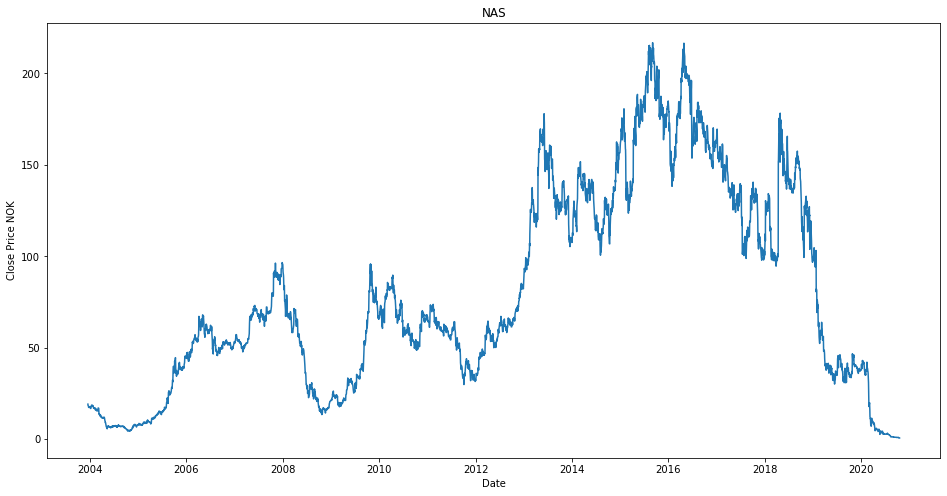

In [5]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [6]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

In [7]:
#Here we are creating a variable for the amount of days into the future
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(50)

,Date,Close,Prediction
4202,2020-08-07,1.5770,1.0445
4203,2020-08-10,1.3470,1.0470
4204,2020-08-11,1.3995,1.0475
4205,2020-08-12,1.4400,1.0325
4206,2020-08-13,1.3200,1.0445
4207,2020-08-14,1.2510,1.0140
4208,2020-08-17,1.3675,1.0170
4209,2020-08-18,1.3000,1.0000
4210,2020-08-19,1.2920,0.9550
4211,2020-08-20,1.2990,0.8674


In [8]:
#Here we are creating the feature data set (X) and converting it into a numpy array where we ignore the last 'x' days
X = np.array(df.drop(['Prediction','Date'], 1))[:-future_days] #This method makes the closing values in a column
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [9]:
#Here we are creating the target data set (y) and converting it into a numpy array where we ignore the last 'x' days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [10]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [12]:
#Get the last 'x' rows/days from the feature data set
#x_future = df.drop(['Prediction','Date'], 1)[:-future_days]
#x_future = x_future.tail(future_days)
#x_future = np.array(x_future)
#x_future

In [13]:
#Creating variable for the future set
x_future = df.drop(['Prediction','Date'], 1)
x_future = x_future.tail(25+future_days)
x_future = np.array(x_future)
x_future

array([[1.577 ],
       [1.347 ],
       [1.3995],
       [1.44  ],
       [1.32  ],
       [1.251 ],
       [1.3675],
       [1.3   ],
       [1.292 ],
       [1.299 ],
       [1.263 ],
       [1.2485],
       [1.2595],
       [1.242 ],
       [1.24  ],
       [1.122 ],
       [1.2135],
       [1.06  ],
       [1.0055],
       [1.125 ],
       [1.0615],
       [1.088 ],
       [1.054 ],
       [1.042 ],
       [1.0425],
       [1.0445],
       [1.047 ],
       [1.0475],
       [1.0325],
       [1.0445],
       [1.014 ],
       [1.017 ],
       [1.    ],
       [0.955 ],
       [0.8674],
       [0.9148],
       [0.92  ],
       [0.94  ],
       [1.    ],
       [1.    ],
       [0.989 ],
       [0.99  ],
       [0.9226],
       [0.9178],
       [0.6964],
       [0.6768],
       [0.6006],
       [0.626 ],
       [0.605 ],
       [0.6106]])

In [14]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[1.0325 1.047  1.0475 1.0325 1.0445 1.014  1.017  1.     0.955  1.
 1.014  0.92   1.014  1.     1.     0.989  0.99   0.9226 0.9178 0.6964
 0.6768 0.6768 0.626  0.605  0.6106 0.6106 0.6106 0.6106 0.605  0.6106
 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178
 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178 0.9178]


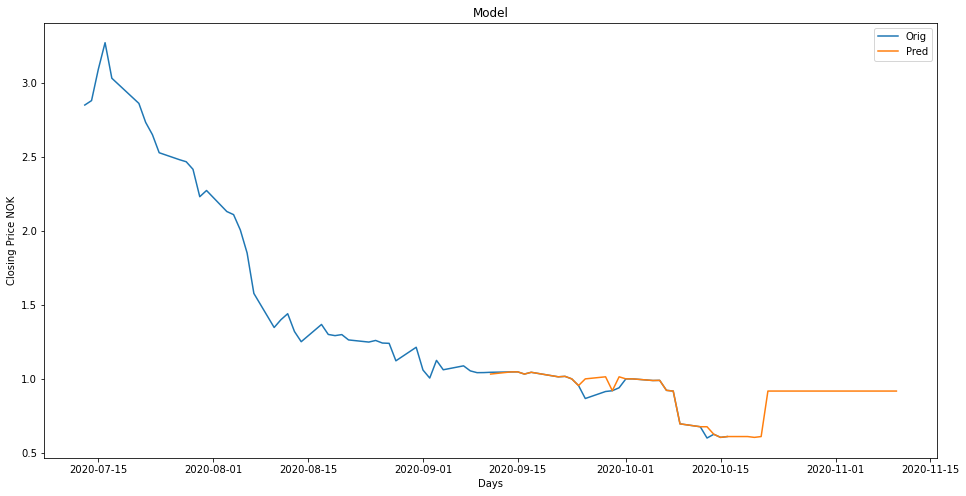

In [15]:
#Here we are going to visualize the prediction
predictions = tree_prediction

#Here we are appending 25 days into the future in the dataset
df = df.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
df = df.reset_index(drop=True)

valid = df[X.shape[0]:].copy()
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
plt.plot(df['Date'][4150:],df['Close'][4150:])
plt.plot(valid['Date'],valid[['Predictions']])
plt.legend(['Orig','Pred'])
plt.show()

#As you can see the yellow line shows the actual price and the green shows the prediction
#From this we can see that the prediction is accurate when price is calm
#But at some points where the price goes up or down the algorithm isn't perfect
#The reason why the model isn't very accurate is because the price over the whole time it has existed has fluctuated alot
#especially in the last year because of the coronavirus

In [16]:
#df['Prediction'].tail(25) = valid['Predictions']

#nydf = nydf.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#nydf = nydf.reset_index(drop=True)

#Here we are creating a variable for the amount of days into the future
#future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
#nydf['Prediction'] = nydf[['Close']].shift(-future_days)
#df.tail(50)

#x1_future = nydf.drop(['Prediction','Date'], 1)
#x1_future = x_future.tail(25+future_days)
#x1_future = np.array(x_future)
#x1_future